<img src="images/Open-Class-198.jpg"/>

<div class="bg-primary text-center">
    - Summary -
</div>

Creating a Web Dashboard for Sensor Data is a vital skill for monitoring real-time data in robotics and IoT applications. It allows efficient data visualization, improves interaction, and provides a framework for controlling and monitoring robotic systems remotely.

In this Open Class, we’ll explore how to build an interactive web dashboard for sensor data using rosbridge_suite and roslibjs.

What you'll learn:

- Introduction to Web Dashboards in Robotics
- Using ROSBridge to connect ROS2 with web interfaces
- Leveraging roslibjs for real-time data visualization and interaction
- Step-by-step guidance on building a dynamic dashboard for monitoring sensor data

This rosject has been created by **Thisas Ranhiru Samaraweera** and **Alberto Ezquerro**.

<div class="bg-primary text-center">
    - Summary -
</div>

<div>
    <h1 class="text-center">
        <span class="text-primary">Introduction</span>
        &nbsp;
        <span class="">Why have a Dashboard ? <br><img src="https://cdn.hiastro.com/wp-content/uploads/2022/05/14200010/Component-16-1.png"  /></span>
            

    
</div>

Congratulations! You’ve built your very own robot, or perhaps you've programmed software for an existing one. When you launch your code, you can see the robot performing as expected.

Ideally, you have your software set up so that a single script handles the entire robot bring-up, and you can verify in RViz2 that everything is functioning as intended!

Now you hand off your finished work to your client—maybe it's an industrial robot in a factory or a service robot in a restaurant. You demonstrate that your system works and go home happy, but the next day, you get multiple phone calls: "The robot is out of control! I don't know how to operate it!"

What happened is, while you understand how the system works and how to monitor the robot visually through RViz2, most people, especially non-technical users, are more accustomed to working with dashboards and one-click tools.

This is why most robots used in companies come with web dashboards, allowing operators to easily control the robot's core functions and view diagnostic information, such as error codes, without needing to rely on development tools like RViz2 or combing through script logs to fix operational issues.

<div>
    <h1 class="text-center">
        <span class="text-primary">Mission Plan ✍️</span>
        &nbsp;
        <span class="">The goal for this Open Class 📝</span>
    </h1>
</div>

We are going to develop a web dashboard for our Limo robot. For this, we will be using `rosbridge` and `roslibjs`, allowing us to control the robot with buttons on the dashboard instead of using keyboard teleop directly on the robot.

<div>
    <h1 class="text-center">
        <span class="">Launch the simulation</span>
    </h1>
</div>

To launch the project simulation:

1. Open a terminal by clicking:

<img src="images/terminal.png"/>

2. Run the launch commands: 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
source ~/ros2_ws/install/setup.bash
ros2 launch limo_description limo_basic.launch.xml

**Wait around 30 seconds** for simulation to start. It should automatically appear in a Gazebo window.

If it doesn't automatically appear, open the Gazebo window by clicking:

<img src="images/gazebo.png"/>

Gazebo window should show the limo world:

<img src="images/sim.png"/>

<div>
    <h1 class="text-center">
        <span class="">What is the <code>ROSBridge server</code>?</span>
    </h1>
</div>

In simple terms, rosbridge_server provides a bridge between ROS 2 and web-based or non-ROS applications, enabling you to send and receive ROS messages over the web or from other non-ROS systems. This is commonly used when you want to create web-based dashboards or interfaces to control a robot or visualize its data remotely.

Some of the main functions of `rosbridge_server` include:

1. Creating a WebSocket connection, which allows bidirectional communication between the robot and web browsers⁠⁠

2. Exposing ROS's publish/subscribe functionality, enabling web applications to publish and subscribe to ROS topics⁠⁠

3. Bridging the gap between ROS's TCP/UDP socket communication and web browsers, which don't have direct access to these protocols⁠⁠

<div>
    <h1 class="text-center">
        <span class="">Installing <code>ROSBridge server</code></span>
    </h1>
</div>

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
sudo apt install ros-humble-rosbridge-server

This will install in the system all the packages required for ROSbridge to work.

<div>
    <h1 class="text-center">
        <span class="">Running <code>ROSBridge server</code></span>
    </h1>
</div>

To start the `rosbridge_server` you can execute the following command:

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
ros2 launch rosbridge_server main_rosbridge_launch.py

<div>
    <h1 class="text-center">
        <span class="">Creating a Web Dashboard</span>
    </h1>
</div>

To create the dashboard, we will be using plain HTML and JavaScript, but you can use any web framework as long as it can interface with roslibjs.

There are also other ways to interface with rosbridge, such as using Python, Rust, or Java. This can help you develop applications and systems that communicate with your robot, such as creating a service to update the food delivery status for an autonomous delivery robot, so both users and the restaurant know when the food has arrived.

Essentially, whenever you need to step outside the ROS 2 ecosystem and communicate with other types of software, you can easily use rosbridge with its standard WebSocket implementation, rather than dealing directly with raw DDS.

To get started open the Code editor.

<img src="images/editor.png" />

Then create an `index.html` inside the `webpage_ws` folder. 

<img src="images/create_index_page.png">

Now we can edit this file with some sample text. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    index.html
</span>

In [ ]:
<h1> Hello Construct </h1>

Once we have added the contents of our webpage we can now serve it to the internet. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
cd ~/webpage_ws
python3 -m http.server 7000

Now to get our web page address we need to type. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
webpage_address

Copy that link and open it in your browser. 

You should see the text that you wrote.

<img src="images/hello_construct.png" />

**NOTE**: This web page will only exist for as long as the rosject is open, it will be closed when the rosject is closed, so if you want to add this Open Class to your CV just include the link to your rosject instead.

<div>
    <h1 class="text-center">
        <span class="">Connecting to ROSBridge</span>
    </h1>
</div>

Now that we can spin up a web server for our webpage and see that our changes are reflected, let's use `roslibjs` to connect to our `rosbridge_server`.

Let's add the basic structure to our Web Dashboard. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    index.html
</span>

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>ROS Web Dashboard</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #f0f0f0;
        }
    </style>
</head>

<body>

<!-- Here is where our dashboard elements will be  -->

</body>

</html>

Now let's add `roslibjs`. 

We will be using the roslibjs v1 version as there is prebuilt library that we can just import on the head of our page. 

In [ ]:
    <script src="https://cdn.jsdelivr.net/npm/roslib@1/build/roslib.min.js"></script>

Then we need to be able to provide our rosbridge address. 

For this we will be making a form in which we can enter the address and the library can make the websocket connection needed to communicate with our robot.

In [ ]:
    <div class="connection-form">
        <input type="text" id="rosbridge-address" placeholder="ws://localhost:9090">
        <button onclick="connectToROS()">Connect</button>
    </div>

This will be in the body of our web page. 

We can add some css to the head of the page to make the formatting a little better

In [ ]:
        .connection-form {
            width: 100%;
            margin-bottom: 20px;
        }

This will be within the style tag in the head of the page. 

You might have noticed earlier that the button has an `onclick` attribute that points to a function. We will have to write that function now. 

Inside the body you will have to create a new script tag, within it you will have to add the following.

In [ ]:
    <script>
        let ros;

        function connectToROS() {
            const rosbridgeAddress = document.getElementById('rosbridge-address').value;
            ros = new ROSLIB.Ros({
                url: rosbridgeAddress
            });

            ros.on('connection', function () {
                console.log('Connected to rosbridge server.');
                // Connected ! 
                // We can now pull date from the topics. 
            });

            ros.on('error', function (error) {
                console.error('Error connecting to rosbridge server:', error);
            });

            ros.on('close', function () {
                console.log('Connection to rosbridge server closed.');
            });
        }

    </script>

Here what we are doing is creating a new ROSLIB.Ros object and passing our rosbridge address as a parameter. 

Now the rosbridge itself can output one of three states,

1. `'connection'` in which we have a successful connection with the rosbridge
2. `'error'` where some kind of error prevented connecting to the rosbrige 
3. `'close'` where the server closes the connection (eg the robot shut down) 

Once we get a proper ‘connection’ we will be able to pull and send data from and to the topics.

The final version of the page should be like this:

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    index.html
</span>

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>ROS Web Dashboard</title>
    <script src="https://cdn.jsdelivr.net/npm/roslib@1/build/roslib.min.js"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #f0f0f0;
        }

        .connection-form {
            width: 100%;
            margin-bottom: 20px;
        }
    </style>
</head>

<body>
    <div class="connection-form">
        <input type="text" id="rosbridge-address" placeholder="ws://localhost:9090">
        <button onclick="connectToROS()">Connect</button>
    </div>

    <script>
        let ros;

        function connectToROS() {
            const rosbridgeAddress = document.getElementById('rosbridge-address').value;
            ros = new ROSLIB.Ros({
                url: rosbridgeAddress
            });

            ros.on('connection', function () {
                console.log('Connected to rosbridge server.');
                // Connected ! 
                // We can now pull date from the topics. 
            });

            ros.on('error', function (error) {
                console.error('Error connecting to rosbridge server:', error);
            });

            ros.on('close', function () {
                console.log('Connection to rosbridge server closed.');
            });
        }

    </script>
</body>

</html>

Now, if you open this webpage you will see something like this:

<img src="images/basic_connection.png" />

In order to get the rosbridge address you can run the following command:

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
rosbridge_address

When you enter the `rosbridge_address` and click the `Connect` button, you will establish the connection with ROS. You should be able to read the message `Connected to rosbridge server` if you open the Developer tools for your browser.

<div>
    <h1 class="text-center">
        <span class="">What is <code>roslibjs</code>?</span>
    </h1>
</div>

In this setup, `roslibjs` plays a key role as the JavaScript library that allows the web dashboard to communicate with the ROS system via the `rosbridge_server`. Specifically, it provides an easy way to interact with ROS topics, services, and parameters through a WebSocket connection, which allows real-time communication between the webpage and ROS.

### How They Work Together?

- `rosbridge_server` runs on the ROS machine and opens up a WebSocket connection to which clients can connect.

- `roslibjs` is used on the client side (in the web browser) to establish a connection to rosbridge_server and interact with the ROS system. It translates user commands into ROS messages and receives ROS data via WebSockets.

In short:

- `roslibjs` is the client-side library that you use to write JavaScript code to interact with ROS.

- `rosbridge_server` is the ROS-side server that enables external, non-ROS clients (like a web browser) to communicate with the ROS system.

<div>
    <h1 class="text-center">
        <span class="">Getting data from a topic </span>
    </h1>
</div>

Now that we have a successful connection, we want to be able to get data from our ROS topics. 

If you run a `ros2 topic list` command, you will see that we have many types of data that we can visualise.

<img src="images/topics.png" width="400" />

Let's start by trying to show the position of the robot in `x` and `y`. 

Once we are connected let's trigger a new function to subscribe to our topics.

In [ ]:
          ros.on('connection', function () {
                console.log('Connected to rosbridge server.');
                setupTopics();
            });

And let us write this `setupTopics` function. 

In [ ]:
        function setupTopics() {
            // Set up odometry topic
            const odomTopic = new ROSLIB.Topic({
                ros: ros,
                name: '/odom',
                messageType: 'nav_msgs/Odometry'
            });

            odomTopic.subscribe(function (message) {
                document.getElementById('position-x').textContent = message.pose.pose.position.x.toFixed(2);
                document.getElementById('position-y').textContent = message.pose.pose.position.y.toFixed(2);
            });
        }


Here we specify a topic called `odomTopic`, we pass the `ros` object, the name of the topic  and the message type. 

Then we subscribe to the topic using `.subscribe` and add a callback function. This function receives the message and changes the text inside any element of the html page with ‘position-x’ and ‘position-y’ to the respective pose.

Note that this callback can also be written separately then passed in which may be useful if you are doing something more complicated like processing that data. 

Now, below our connection form, let's add the `position-x` and `position-y` elements to be displayed:

In [ ]:
    <div class="dashboard">
        <div class="position-display">
            <h3>Position</h3>
            <p>X: <span id="position-x">0</span></p>
            <p>Y: <span id="position-y">0</span></p>
        </div>
    </div>

Then add a little bit of styling:

In [ ]:
        .dashboard {
            display: flex;
            flex-wrap: wrap;
            gap: 20px;
        }

        .position-display {
            width: 200px;
            padding: 10px;
            background-color: #fff;
            border-radius: 5px;
        }

Now the full code should look like this.

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    index.html
</span>

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>ROS Web Dashboard</title>
    <script src="https://cdn.jsdelivr.net/npm/roslib@1/build/roslib.min.js"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #f0f0f0;
        }

        .dashboard {
            display: flex;
            flex-wrap: wrap;
            gap: 20px;
        }

        .connection-form {
            width: 100%;
            margin-bottom: 20px;
        }


        .position-display {
            width: 200px;
            padding: 10px;
            background-color: #fff;
            border-radius: 5px;
        }
    </style>
</head>

<body>
    <div class="connection-form">
        <input type="text" id="rosbridge-address" placeholder="ws://localhost:9090">
        <button onclick="connectToROS()">Connect</button>
    </div>
    <div class="dashboard">
        <div class="position-display">
            <h3>Position</h3>
            <p>X: <span id="position-x">0</span></p>
            <p>Y: <span id="position-y">0</span></p>
        </div>
    </div>

    <script>
        let ros;

        function connectToROS() {
            const rosbridgeAddress = document.getElementById('rosbridge-address').value;
            ros = new ROSLIB.Ros({
                url: rosbridgeAddress
            });

            ros.on('connection', function () {
                console.log('Connected to rosbridge server.');
                setupTopics();
            });

            ros.on('error', function (error) {
                console.error('Error connecting to rosbridge server:', error);
            });

            ros.on('close', function () {
                console.log('Connection to rosbridge server closed.');
            });
        }

        function setupTopics() {
            // Set up odometry topic
            const odomTopic = new ROSLIB.Topic({
                ros: ros,
                name: '/odom',
                messageType: 'nav_msgs/Odometry'
            });

            odomTopic.subscribe(function (message) {
                document.getElementById('position-x').textContent = message.pose.pose.position.x.toFixed(2);
                document.getElementById('position-y').textContent = message.pose.pose.position.y.toFixed(2);
            });
        }


    </script>
</body>

</html>

The updated page should look something like this:

<img src="images/odom.png" />

You can move the robot around with the following program:

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
ros2 run teleop_twist_keyboard teleop_twist_keyboard

You should see that the odom data updates in real time in the webpage. 

But it would be much better if we were able to move the robot through the dashboard too, right ? 

To be able to move the robot through a virtual joystick we will be using another small library called `nippleJS`  (https://github.com/yoannmoinet/nipplejs) which provides an easy way to add joystick to any website.

To include this library we can import it through a CDN.

In [ ]:
    <script src="https://cdnjs.cloudflare.com/ajax/libs/nipplejs/0.9.0/nipplejs.min.js"></script>

Then we need to setup a new topic called `cmdVelTopic`. Here you’ll notice that we are not creating the variable but assigning the value. 

In [ ]:
            // Set up cmd_vel topic
            cmdVelTopic = new ROSLIB.Topic({
                ros: ros,
                name: '/cmd_vel',
                messageType: 'geometry_msgs/Twist'
            });

The `cmdVelTopic` variable in this case will be a global since we will want to interface to it through the joystick which is in a seperate function.

In [ ]:
        let ros;
        let cmdVelTopic;
        let joystick;

So you need to initialise it just bellow the ros variable. 

We will add a new function in the bottom.

In [ ]:
          // Set up joystick
            setupJoystick();

And define the `setupJoystick` function:

In [ ]:
        function setupJoystick() {
            const options = {
                zone: document.getElementById('joystick'),
                mode: 'static',
                position: {left: '50%', top: '50%'},
                color: 'blue',
                size: 150
            };

            joystick = nipplejs.create(options);

            joystick.on('move', function (evt, data) {
                const maxSpeed = 1.0; // m/s
                const maxTurn = 1.0; // rad/s

                const linear = Math.sin(data.angle.radian) * maxSpeed * data.distance / 75;
                const angular = -Math.cos(data.angle.radian) * maxTurn * data.distance / 75;

                const twist = new ROSLIB.Message({
                    linear: {x: linear, y: 0, z: 0},
                    angular: {x: 0, y: 0, z: angular}
                });

                cmdVelTopic.publish(twist);
            });

            joystick.on('end', function () {
                const twist = new ROSLIB.Message({
                    linear: {x: 0, y: 0, z: 0},
                    angular: {x: 0, y: 0, z: 0}
                });

                cmdVelTopic.publish(twist);
            });
        }

We create a new joystick object and then much like with ROSLIB we will use the `.on` notation to assign callbacks to specific actions.

In this case it can be one of two.

1. ‘move’ : which is when the joystick is moving in which case we translate the position of the joystick into a twist command that we send to the robot. 
2. ‘end’ : which is when the joystick is not moving in which we send a stop command to the robot so it does not continue the previous command. 

Then we will want to add the joystick element to the html part of the page.

In [ ]:
        <div class="joystick-container" id="joystick"></div>

And some styling. 

In [ ]:
        .joystick-container {
            width: 200px;
            height: 200px;
            background-color: #ddd;
            border-radius: 50%;
            position: relative;
            overflow: hidden;
        }


So our full code becomes:

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    index.html
</span>

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>ROS Web Dashboard</title>
    <script src="https://cdn.jsdelivr.net/npm/roslib@1/build/roslib.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/nipplejs/0.9.0/nipplejs.min.js"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #f0f0f0;
        }

        .dashboard {
            display: flex;
            flex-wrap: wrap;
            gap: 20px;
        }

        .connection-form {
            width: 100%;
            margin-bottom: 20px;
        }

        .joystick-container {
            width: 200px;
            height: 200px;
            background-color: #ddd;
            border-radius: 50%;
            position: relative;
            overflow: hidden;
        }

        .position-display {
            width: 200px;
            padding: 10px;
            background-color: #fff;
            border-radius: 5px;
        }
    </style>
</head>

<body>
    <div class="connection-form">
        <input type="text" id="rosbridge-address" placeholder="ws://localhost:9090">
        <button onclick="connectToROS()">Connect</button>
    </div>
    <div class="dashboard">
        <div class="joystick-container" id="joystick"></div>
        <div class="position-display">
            <h3>Position</h3>
            <p>X: <span id="position-x">0</span></p>
            <p>Y: <span id="position-y">0</span></p>
        </div>
    </div>

    <script>
        let ros;
        let cmdVelTopic;
        let joystick;

        function connectToROS() {
            const rosbridgeAddress = document.getElementById('rosbridge-address').value;
            ros = new ROSLIB.Ros({
                url: rosbridgeAddress
            });

            ros.on('connection', function () {
                console.log('Connected to rosbridge server.');
                setupTopics();
            });

            ros.on('error', function (error) {
                console.error('Error connecting to rosbridge server:', error);
            });

            ros.on('close', function () {
                console.log('Connection to rosbridge server closed.');
            });
        }

        function setupTopics() {
            // Set up cmd_vel topic
            cmdVelTopic = new ROSLIB.Topic({
                ros: ros,
                name: '/cmd_vel',
                messageType: 'geometry_msgs/Twist'
            });

            // Set up odometry topic
            const odomTopic = new ROSLIB.Topic({
                ros: ros,
                name: '/odom',
                messageType: 'nav_msgs/Odometry'
            });

            odomTopic.subscribe(function (message) {
                document.getElementById('position-x').textContent = message.pose.pose.position.x.toFixed(2);
                document.getElementById('position-y').textContent = message.pose.pose.position.y.toFixed(2);
            });

            // Set up joystick
            setupJoystick();
        }

        function setupJoystick() {
            const options = {
                zone: document.getElementById('joystick'),
                mode: 'static',
                position: {left: '50%', top: '50%'},
                color: 'blue',
                size: 150
            };

            joystick = nipplejs.create(options);

            joystick.on('move', function (evt, data) {
                const maxSpeed = 1.0; // m/s
                const maxTurn = 1.0; // rad/s

                const linear = Math.sin(data.angle.radian) * maxSpeed * data.distance / 75;
                const angular = -Math.cos(data.angle.radian) * maxTurn * data.distance / 75;

                const twist = new ROSLIB.Message({
                    linear: {x: linear, y: 0, z: 0},
                    angular: {x: 0, y: 0, z: angular}
                });

                cmdVelTopic.publish(twist);
            });

            joystick.on('end', function () {
                const twist = new ROSLIB.Message({
                    linear: {x: 0, y: 0, z: 0},
                    angular: {x: 0, y: 0, z: 0}
                });

                cmdVelTopic.publish(twist);
            });
        }
    </script>
</body>

</html>

The updated page should look like this:

<img src="images/joystick.png" />

<div>
    <h1 class="text-center">
        <span class="">Bonus ! Getting images from a topic </span>
    </h1>
</div>

Great work so far ! 

Now we can move our robot and visualize our position in the webpage. But we can’t really ‘see’ what the robot is seeing.

We know that there are some image topics that we might be able to use when we executed the `ros2 topic list` command. 

So let's try to add a camera view. This way, when we control the robot, we don’t need to look to the simulation to check if it actually moved, and we can fully teleoperate the robot from the webpage. 

Now you already know from the odom example a bit of what you have to do. 

1. Setup a imageTopic pointing to ros, name and message type
    1. You will need to use topic `/camera/image_raw/compressed`
    2. Message type is `sensor_msgs/CompressedImage`
    
    
2. Subscribe to the topic and add a function callback to display the image
    1. Use `document.getElementById('camera-feed').src = "data:image/jpeg;base64," + message.data;`  to display the data to a &lt;img&gt; element
    
    
3. Add a image tag with the id `camera-feed` 


4. Add some styling to make it fit on the dashboard properly.

The final result should look something like this:

<img src="images/open_class_dashboard.gif" />

## Full Code 

Hey ! No Cheating ! Make sure to try your best before double checking with this code. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    index.html
</span>

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>ROS Web Dashboard</title>
    <script src="https://cdn.jsdelivr.net/npm/roslib@1/build/roslib.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/nipplejs/0.9.0/nipplejs.min.js"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #f0f0f0;
        }

        .dashboard {
            display: flex;
            flex-wrap: wrap;
            gap: 20px;
        }

        .connection-form {
            width: 100%;
            margin-bottom: 20px;
        }

        .joystick-container {
            width: 200px;
            height: 200px;
            background-color: #ddd;
            border-radius: 50%;
            position: relative;
            overflow: hidden;
        }

        .image-view {
            width: 640px;
            height: 480px;
            background-color: #000;
        }

        .position-display {
            width: 200px;
            padding: 10px;
            background-color: #fff;
            border-radius: 5px;
        }
    </style>
</head>

<body>
    <div class="connection-form">
        <input type="text" id="rosbridge-address" placeholder="ws://localhost:9090">
        <button onclick="connectToROS()">Connect</button>
    </div>
    <div class="dashboard">
        <div class="joystick-container" id="joystick"></div>
        <img class="image-view" id="camera-feed" alt="Camera Feed">
        <div class="position-display">
            <h3>Position</h3>
            <p>X: <span id="position-x">0</span></p>
            <p>Y: <span id="position-y">0</span></p>
        </div>
    </div>

    <script>
        let ros;
        let cmdVelTopic;
        let joystick;

        function connectToROS() {
            const rosbridgeAddress = document.getElementById('rosbridge-address').value;
            ros = new ROSLIB.Ros({
                url: rosbridgeAddress
            });

            ros.on('connection', function () {
                console.log('Connected to rosbridge server.');
                setupTopics();
            });

            ros.on('error', function (error) {
                console.error('Error connecting to rosbridge server:', error);
            });

            ros.on('close', function () {
                console.log('Connection to rosbridge server closed.');
            });
        }

        function setupTopics() {
            // Set up cmd_vel topic
            cmdVelTopic = new ROSLIB.Topic({
                ros: ros,
                name: '/cmd_vel',
                messageType: 'geometry_msgs/Twist'
            });

            // Set up camera topic
            const imageTopic = new ROSLIB.Topic({
                ros: ros,
                name: '/camera/image_raw/compressed',
                messageType: 'sensor_msgs/CompressedImage'
            });

            imageTopic.subscribe(function (message) {
                document.getElementById('camera-feed').src = "data:image/jpeg;base64," + message.data;
            });

            // Set up odometry topic
            const odomTopic = new ROSLIB.Topic({
                ros: ros,
                name: '/odom',
                messageType: 'nav_msgs/Odometry'
            });

            odomTopic.subscribe(function (message) {
                document.getElementById('position-x').textContent = message.pose.pose.position.x.toFixed(2);
                document.getElementById('position-y').textContent = message.pose.pose.position.y.toFixed(2);
            });

            // Set up joystick
            setupJoystick();
        }

        function setupJoystick() {
            const options = {
                zone: document.getElementById('joystick'),
                mode: 'static',
                position: {left: '50%', top: '50%'},
                color: 'blue',
                size: 150
            };

            joystick = nipplejs.create(options);

            joystick.on('move', function (evt, data) {
                const maxSpeed = 1.0; // m/s
                const maxTurn = 1.0; // rad/s

                const linear = Math.sin(data.angle.radian) * maxSpeed * data.distance / 75;
                const angular = -Math.cos(data.angle.radian) * maxTurn * data.distance / 75;

                const twist = new ROSLIB.Message({
                    linear: {x: linear, y: 0, z: 0},
                    angular: {x: 0, y: 0, z: angular}
                });

                cmdVelTopic.publish(twist);
            });

            joystick.on('end', function () {
                const twist = new ROSLIB.Message({
                    linear: {x: 0, y: 0, z: 0},
                    angular: {x: 0, y: 0, z: 0}
                });

                cmdVelTopic.publish(twist);
            });
        }
    </script>
</body>

</html>

<div>
    <h1 class="text-center">
        <span class="">Go Further !</span>
    </h1>
</div>

Would you like to control and monitor robots with ROS using just your web browser?

The “Developing Web Interfaces for ROS” is the right course for you! We dive, step-by-step, into many different widgets that communicate directly to ROS using only HTML and JavaScript code. You will learn the essential and be able to develop more using the knowledge acquired.

What You Will Learn

- Understand how to make ROS data available to other environments
- Understand how to create simple but efficient web pages
- How to publish to topics and control robots from the web
- How to subscribe to topics and monitor ROS data from the web
- How to work with ROS params from the web
- How to consume ROS services and action servers from the web
- Create powerful interfaces that show: 3D models, maps and camera images
    
<a href="https://app.theconstruct.ai/courses/42"><img src="images/course_promo.png" /></a>

# Share your work 📨

We love seeing what our students do with the things they learn here so please do share what you do on social media and make sure to tag us so we know.

[Twitter (X) | @_TheConstruct_](https://twitter.com/_theconstruct_) 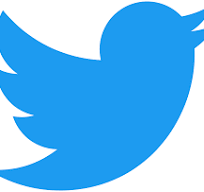

[Facebook | The Construct ](https://www.facebook.com/theconstructsim) 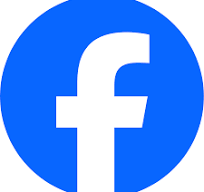
